<a href="https://colab.research.google.com/github/gpadmaperuma/DATA620-GroupHomework/blob/main/DATA_620_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3 - Name Gender Classifier
**by Don Padmaperuma & Grace Han**

## Assignment

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can. 

Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. 

Then, starting with the example name gender classifier, make incremental improvements. 

Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set. 

How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?



In [17]:
import collections
import nltk
nltk.download('names')
from nltk.corpus import names
from nltk.classify import apply_features
from nltk.metrics import ConfusionMatrix, accuracy, precision, recall, f_measure
import random

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [19]:
len(names.words('female.txt')), len(names.words('male.txt'))

(5001, 2943)

We can see from above numbers that there are more female names (almost twise as male names) compared to the male names in the dataset. 

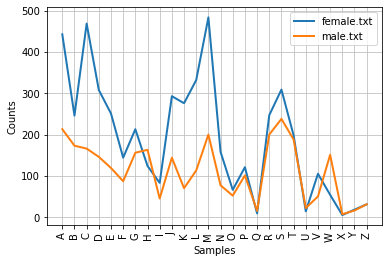

In [20]:
# Check distribution of the first letter of the name.
gender_freq = nltk.ConditionalFreqDist((fileid, name[0])
  for fileid in names.fileids()
  for name in names.words(fileid))
gender_freq.plot()

Above graph shows the comparison of distribution of beginning letter of the names by gender. We can see that more female names starts with letter A, C, M and S. 

In [21]:
# combine male and female names and shuffle them.
names = ([(name, 'male') for name in names.words('male.txt')] + \
        [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)

In [22]:
# Take a look at the combined data
names[1:15]

[('Anja', 'female'),
 ('Ernest', 'male'),
 ('Selia', 'female'),
 ('Jolyn', 'female'),
 ('Gere', 'male'),
 ('Amalia', 'female'),
 ('Kathye', 'female'),
 ('Syd', 'male'),
 ('Tallie', 'male'),
 ('Sibel', 'female'),
 ('Nicholle', 'female'),
 ('Sarine', 'female'),
 ('Gillie', 'female'),
 ('Rena', 'female')]

## Split into Train and Test Data


In [23]:
# unique names
len(set(item[0] for item in names))

7579

We removed the names that was listed as both males and females and was listed twice.

In [26]:
# names that are not unique
names_only = [item[0] for item in names]
names_dist = nltk.FreqDist(names_only)
names_duplicates = [(k,v) for k,v in names_dist.items() if v>1 ] 
names_duplicates

[('Millicent', 2),
 ('Tallie', 2),
 ('Sonny', 2),
 ('Randy', 2),
 ('Lin', 2),
 ('Jessie', 2),
 ('Lee', 2),
 ('Darryl', 2),
 ('Mickie', 2),
 ('Timmy', 2),
 ('Kyle', 2),
 ('Lyn', 2),
 ('Jordan', 2),
 ('Ariel', 2),
 ('Fran', 2),
 ('Vinnie', 2),
 ('Carlie', 2),
 ('Devin', 2),
 ('Carey', 2),
 ('Shaine', 2),
 ('Barrie', 2),
 ('Isa', 2),
 ('Ruby', 2),
 ('Isador', 2),
 ('Austin', 2),
 ('Sayre', 2),
 ('Sibyl', 2),
 ('Angel', 2),
 ('Tracy', 2),
 ('Nichole', 2),
 ('Reggie', 2),
 ('Jesse', 2),
 ('Gene', 2),
 ('Alfie', 2),
 ('Caryl', 2),
 ('Leslie', 2),
 ('Andy', 2),
 ('Ginger', 2),
 ('Leigh', 2),
 ('Winny', 2),
 ('Cat', 2),
 ('Benny', 2),
 ('Michel', 2),
 ('George', 2),
 ('Cary', 2),
 ('Willi', 2),
 ('Shayne', 2),
 ('Alexis', 2),
 ('Sydney', 2),
 ('Kris', 2),
 ('Nickie', 2),
 ('Paige', 2),
 ('Frank', 2),
 ('Cris', 2),
 ('Allyn', 2),
 ('Claude', 2),
 ('Terri', 2),
 ('Matty', 2),
 ('Teddy', 2),
 ('Fred', 2),
 ('Brett', 2),
 ('Blake', 2),
 ('Randie', 2),
 ('Penny', 2),
 ('Alix', 2),
 ('Gabriell', 2),